# Predicting Dutch Speaking Proficiency in Adult Language Learners

This project aims to predict the speaking proficiency of adult learners taking the State Examination of Dutch as a Second Language (STEX) using machine learning models. The dataset, originally compiled by Schepens, van Hout, and Jaeger (2020) and available on [Kaggle](https://www.kaggle.com/datasets/thedevastator/adult-language-learning-profile/data?select=stex.csv), contains anonymized exam results and demographic information of learners residing in the Netherlands.

#### Key features considered include:

- Linguistic background (e.g., native language, language family)
- Demographic factors (e.g., age of arrival, length of residence)
- Education & Enrollment (e.g., prior schooling, education accessibility)
- Personal attributes 

#### The project follows a structured ML pipeline, including:

- Data preprocessing: Cleaning, feature selection, and encoding.
- Model training: Linear Regression, Decision Trees, Random Forest, and Gradient Boosting.
- Model evaluation: Using RMSE and R² to determine predictive accuracy.
- Feature importance analysis: Identifying key factors influencing speaking proficiency.

The results of this study can help policymakers and educators understand the strongest predictors of language learning success, potentially guiding future language programs and interventions.

#### Project Contributors

This project was developed by:
- [Yohan Jair Rivera Farías](https://www.linkedin.com/in/yohan-rivera-12b847261/)
- Fabián Hernando Rivera Farías 

Computer Science students at Unicomfacauca in Popayán, Colombia 🇨🇴 

It was completed as part of their final project for the AI4All elective, under the supervision of Professor [Viviana Márquez](https://www.linkedin.com/in/vivianamarquez/). 

<hr>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Loading

In [2]:
df = pd.read_csv("data/stex.csv", encoding = "ISO-8859-1")

In [3]:
df.head()

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
0,Afrikaans,SouthAfrica,AfrikaansEnglish,English,25,0,4.0,Female,Indo-European,afr,93,496,NaN,0.010463,NaN,NaN
1,Afrikaans,SouthAfrica,AfrikaansGerman,German,47,2,4.0,Male,Indo-European,afr,93,542,NaN,0.010463,NaN,NaN
2,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,23,23,3.0,Female,Indo-European,afr,93,585,NaN,0.010463,NaN,NaN
3,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,42,2,2.0,Female,Indo-European,afr,93,521,NaN,0.010463,NaN,NaN
4,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,22,19,3.0,Female,Indo-European,afr,93,639,NaN,0.010463,NaN,NaN


#### Data dictionary provided by OP

|  Name  | Description  |  Type |
|:-------------:|:-------------:|:-----------:|
| **L1**  | Native language of the participant.  | *String* |
| **C**  | Country of origin of the participant.  | *String* |
| **L1L2**  | Linguistic similarity between the native language and the target language.  | *Integer* |
| **AaA**  | Age at arrival in the Netherlands.  | *Integer* |
| **LoR**  | Length of residence in the Netherlands.  | *Integer* |
| **Edu.day**  | Formal education days in the target language.  | *Integer* |
| **Sex**  | Gender of the participant.  | *String* |
| **Family**  | Family status of the participant.  | *String* |
| **ISO639.3**  | ISO 639-3 codes for the target language.  | *String* |
| **Enroll**  | Duration enrolled in language courses.  | *Integer* |
| **Speaking**  | Speaking proficiency test score on the State Examination of Dutch as a Second Language.  | *Integer* |
| **morph**  | Morphological score related to knowledge structures within words.  | *Integer* |
| **lex**  | Lexicon score indicating understanding of written words.  | *Integer* |
| **new_feat**  | Feature score reflecting ability to acquire new sounds/grammatical structures.  | *Integer* |
| **new_sounds**  | Sound symbols score evaluating pronunciation.  | *Integer* |


# 2. Exploratory Data Analysis

In [4]:
print("Number of rows and columns in the dataset")
print(df.shape)

Number of rows and columns in the dataset
(50235, 16)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50235 entries, 0 to 50234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   L1          50235 non-null  object 
 1   C           50235 non-null  object 
 2   L1L2        50235 non-null  object 
 3   L2          50235 non-null  object 
 4   AaA         50235 non-null  int64  
 5   LoR         50235 non-null  int64  
 6   Edu.day     50226 non-null  float64
 7   Sex         50235 non-null  object 
 8   Family      50235 non-null  object 
 9   ISO639.3    50235 non-null  object 
 10  Enroll      50235 non-null  int64  
 11  Speaking    50235 non-null  int64  
 12  morph       48426 non-null  float64
 13  lex         50235 non-null  float64
 14  new_feat    48219 non-null  float64
 15  new_sounds  48219 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 6.1+ MB


In [6]:
print("Descriptive statistics of numerical variables:")
df.describe()

Descriptive statistics of numerical variables:


,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
count,50235.000000,50235.000000,50226.000000,50235.000000,50235.000000,48426.000000,50235.000000,48219.000000,48219.000000
mean,26.487648,3.923002,3.134213,81.147029,517.622275,0.050150,0.411063,14.468073,20.117049
std,7.245634,4.275746,0.855379,25.346411,37.917385,0.056546,0.189779,5.645576,3.602436
min,0.000000,0.000000,1.000000,8.000000,270.000000,-0.017100,0.010463,6.000000,13.000000
25%,22.000000,2.000000,3.000000,67.000000,494.000000,0.018300,0.388004,11.000000,19.000000
50%,26.000000,3.000000,3.000000,86.000000,516.000000,0.047900,0.398649,14.000000,21.000000
75%,30.000000,5.000000,4.000000,100.000000,540.000000,0.063800,0.595079,21.000000,23.000000
max,88.000000,59.000000,4.000000,148.000000,685.000000,0.326900,0.595079,32.000000,27.000000


In [7]:
print("Descriptive statistics of categorical variables:")
df.describe(include=['object', 'category'])

Descriptive statistics of categorical variables:


,L1,C,L1L2,L2,Sex,Family,ISO639.3
count,50235,50235,50235,50235,50235,50235,50235
unique,70,119,737,44,2,14,70
top,Arabic,Germany,GermanEnglish,English,Female,Indo-European,ara
freq,5927,4869,4335,27886,33310,34345,5927


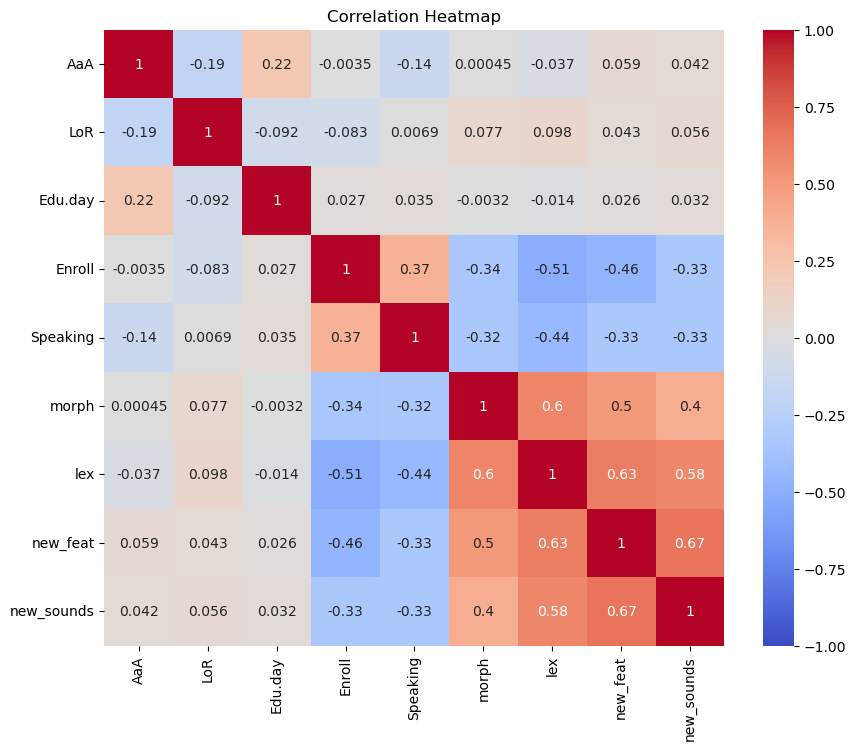

In [8]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation heatmap for the numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Insights from the correlation matrix

~~- **Linguistic skills are strongly interconnected**
    - There is a positive correlation between the morphological knowledge (`morph`), lexical knowledge (`lex`), ability to acquire new structures (`new_feat`), and pronunciation skills (`new_sounds`). 
    - This suggest that participants  who excel in understanding word structures (morphology) tend to have stronger vocabulary knowledge (lexicon), while those adept at acquiring new grammatical structures are also better at pronunciation. 
    - Additionally, a strong vocabulary is linked to better pronunciation, suggesting that written and spoken language skills develop together rather than in isolation.~~ Conclusion removed given that we realized the same value was imputed for all speakers of the same native language for these features.
    
    
- **Speaking proficiency develops independently from linguistic skills**
    - Speaking scores (`Speaking`) have negative correlations with morphological knowledge (`morph`), lexical knowledge (`lex`), phonological adaptability (`new_feat`), and and pronunciation (`new_sounds`).
    - Given that these features have the same values for speakers of the same native language, this suggests that linguistic similarity from one's native language does not necessarily translate into better oral fluency in Dutch.
    - This reinforces the idea that language acquisition is influenced by more than just structural similarities—active practice, immersion, and speaking-focused training might be key factors.
    

- **Simply living in the Netherlands won't determine language proficiency**
    - Age at Arrival (`AaA`) and Length of Residence (`LoR`) show very low correlations with most language proficiency metrics. 
    - This suggests that simply living in the Netherlands longer or arriving at an earlier age does not strongly determine speaking proficiency or language skills.
    - Other factors, such as language learning strategies, motivation, and exposure, might play a more significant role.

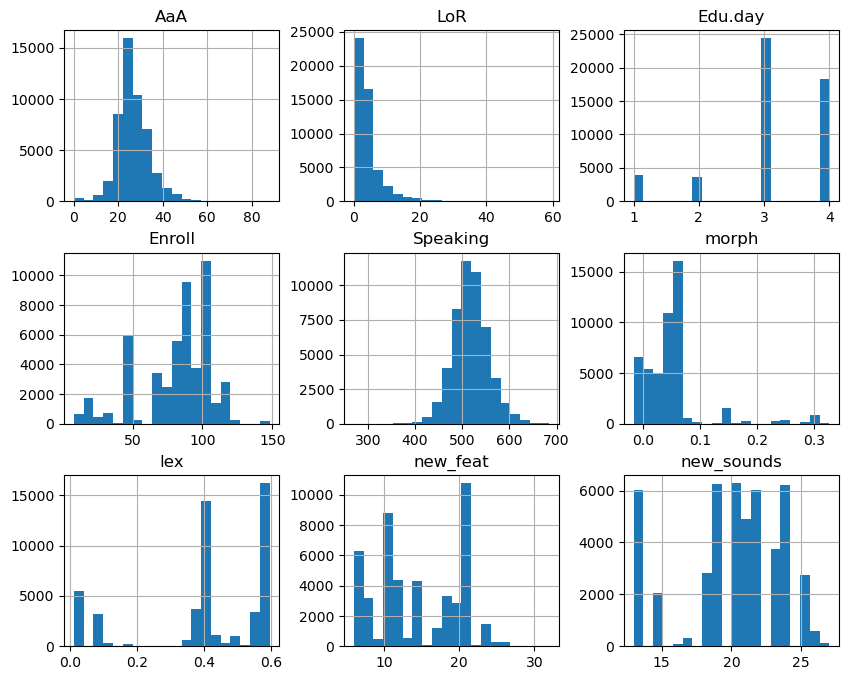

In [9]:
# Histograms for numerical variables
df_numeric.hist(bins=20, figsize=(10, 8))
plt.show()

- Most participants arrived in the Netherlands between ages 20 and 40
- Most participants are recent immigrants, meaning they have spent less than 10 years in the country
- Most participants have had at least 11 years of schooling, with a significant number having 16 or more years. 
- Enrollment in the courses show multiple peaks, suggesting that different groups of learners follow distinct enrollment patterns (some my enroll in shorter courses, while others take extensive language training) 
- Speaking proficiency is normally distributed, meaning that most learners score around the average speaking proficiency 
- Most participants have very low morphological knowledge scores. This could indicate that morphological knowledge is difficult to acquire for second-language learners.
- The two distinct peaks suggest that learners may fall into two groups. This may indicate that some learners have prior exposure to Dutch-like languages, while others do not.
- Pronunciation skills appear to be mostly uniformly spread.This could mean that different learners have very different levels of phonetic adaptation, potentially influenced by their native language’s similarity to Dutch.

From the histograms above, we decided to take a closer look int `lex` and `new_sounds`.

In [10]:
df_filtered = df[df['Family']!='Indo-European']
df_filtered.lex.value_counts()

lex
0.595079    15890
Name: count, dtype: int64

- `lex` is identical (0.595079) for all non-Indo-European languages, this suggests that the dataset might not have real variation in lexical knowledge for these groups.
- It could be due to missing data that was filled with a default value, or a calculated proxy value rather than actual test scores.
- This could bias the results and overestimate the uniformity of lexical knowledge for non-Indo-European learners.
- This will impact our Machine Learning modeling choices later on

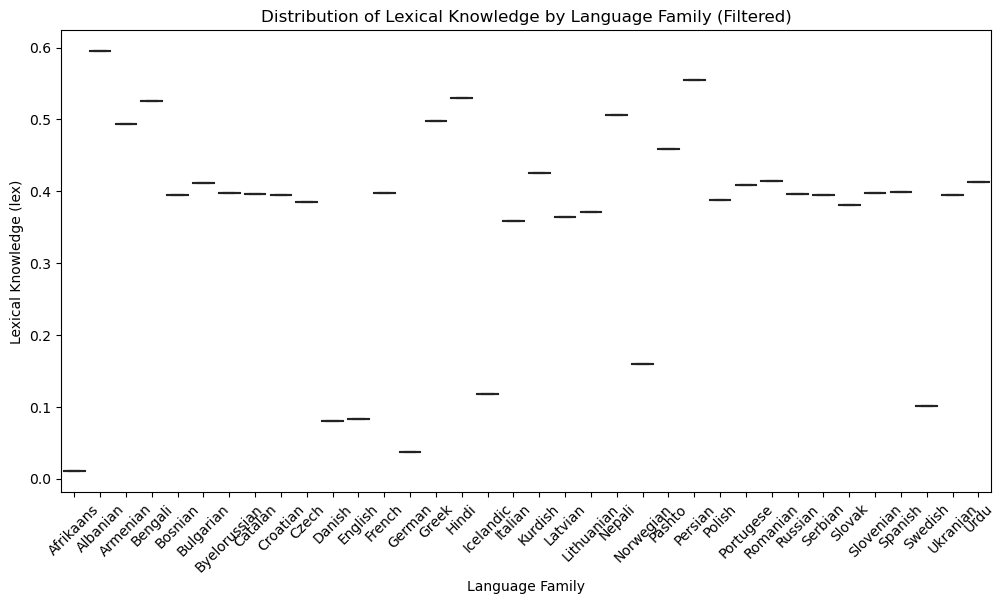

In [11]:
df_filtered = df[df['Family']=='Indo-European']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='L1', y='lex', palette="Reds")

plt.xticks(rotation=45)
plt.xlabel("Language Family")
plt.ylabel("Lexical Knowledge (lex)")
plt.title("Distribution of Lexical Knowledge by Language Family (Filtered)")

plt.show()

- This boxplot shows the distribution of Lexical Knowledge (`lex`) across different native languages. The lack of variation within each native language suggests that every participant from the same native language has the exact same lex score. If `lex` were measured directly from test scores, we would expect some variation within each native language. The fact that all participants from the same native language share the same `lex` score suggests that it was either precomputed based on external linguistic data or categorized rather than measured per individual. This means that models will treat lex as a proxy for native language rather than a real independent predictor. **Therefore, we will drop `lex` from our model.**

Now, let's examine `new_sounds`:

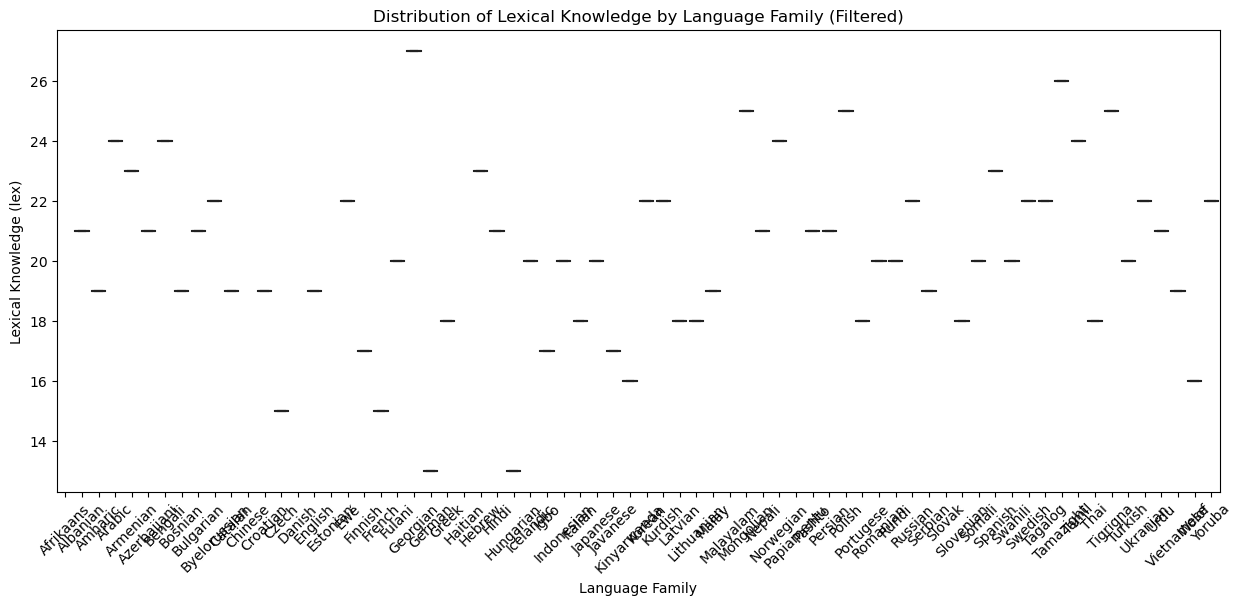

In [12]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='L1', y='new_sounds', palette="Reds")

plt.xticks(rotation=45)
plt.xlabel("Language Family")
plt.ylabel("Lexical Knowledge (lex)")
plt.title("Distribution of Lexical Knowledge by Language Family (Filtered)")

plt.show()

Uh oh, seems like we have the same problem again. What other variables could be displaying the same behaviour? 

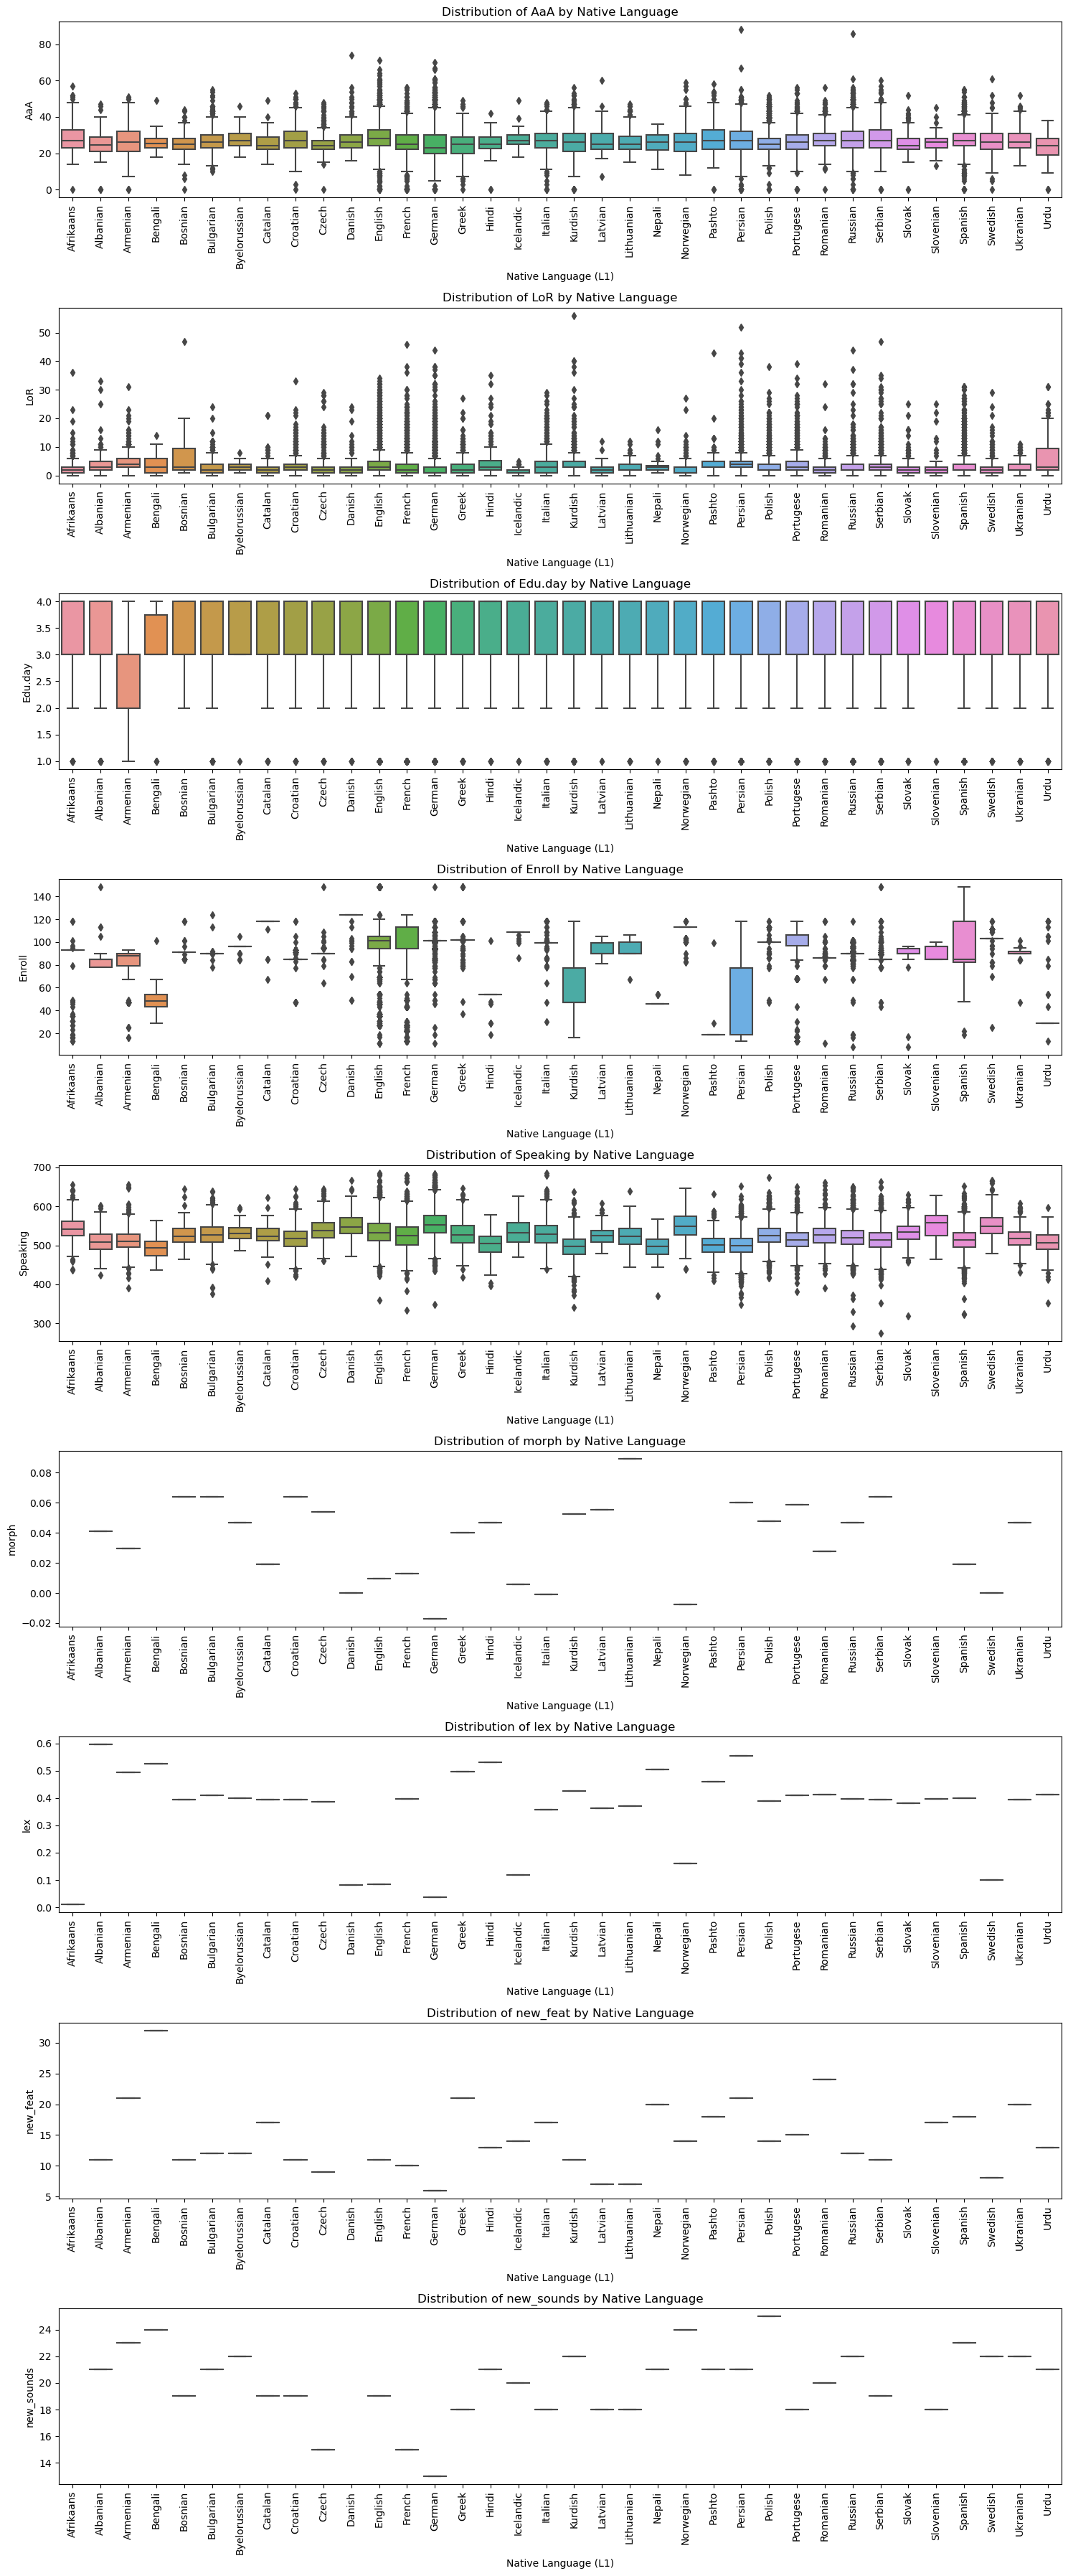

In [13]:
# Select only numerical variables
numerical_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, len(numerical_columns) * 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=df_filtered, x='L1', y=col)
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.xlabel("Native Language (L1)")
    plt.ylabel(col)
    plt.title(f"Distribution of {col} by Native Language")

plt.tight_layout()
plt.show()

The fact that all participants from the same native language share the same `morph`, `lex`, `new_feat`, and `new_sounds` scores suggests that these metrics were not measured per individual. To avoid models that will treat those variables as a proxy for native language rather than a real independent predictor, **we will drop them from our model.**

In [14]:
to_drop = ['morph', 'lex', 'new_feat', 'new_sounds']
df = df.drop(columns=to_drop)

In [15]:
# New dataset
df.head()

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking
0,Afrikaans,SouthAfrica,AfrikaansEnglish,English,25,0,4.0,Female,Indo-European,afr,93,496
1,Afrikaans,SouthAfrica,AfrikaansGerman,German,47,2,4.0,Male,Indo-European,afr,93,542
2,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,23,23,3.0,Female,Indo-European,afr,93,585
3,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,42,2,2.0,Female,Indo-European,afr,93,521
4,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,22,19,3.0,Female,Indo-European,afr,93,639


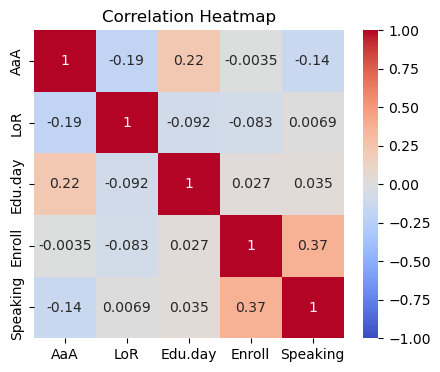

In [16]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Additional insights:
- Time spent in language courses (`Enroll`) is positively correlated with speaking proficiency (`Speaking`). This suggests that longer participation in formal language courses is associated with higher speaking scores. However, correlation does not imply causation—this could mean that dedicated learners enroll longer, rather than courses directly improving proficiency.
- Age at Arrival (`AaA`) has a weak negative correlation with `Speaking`. This indicates that arriving in the Netherlands at an older age is slightly associated with lower speaking proficiency. However, the correlation is weak, meaning age alone is not a strong predictor of language learning success.
- General education level (`Edu.day`) has a weak positive correlation with `Speaking`. This suggests that individuals with more years of formal education tend to have slightly higher speaking proficiency. However, since the correlation is weak, this implies that general education alone is not a strong determinant of language learning success—factors like language exposure, motivation, and practice likely play a bigger role.

In [17]:
# Select only categorical features
df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,L1,C,L1L2,L2,Sex,Family,ISO639.3
0,Afrikaans,SouthAfrica,AfrikaansEnglish,English,Female,Indo-European,afr
1,Afrikaans,SouthAfrica,AfrikaansGerman,German,Male,Indo-European,afr
2,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,Female,Indo-European,afr
3,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,Female,Indo-European,afr
4,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,Female,Indo-European,afr


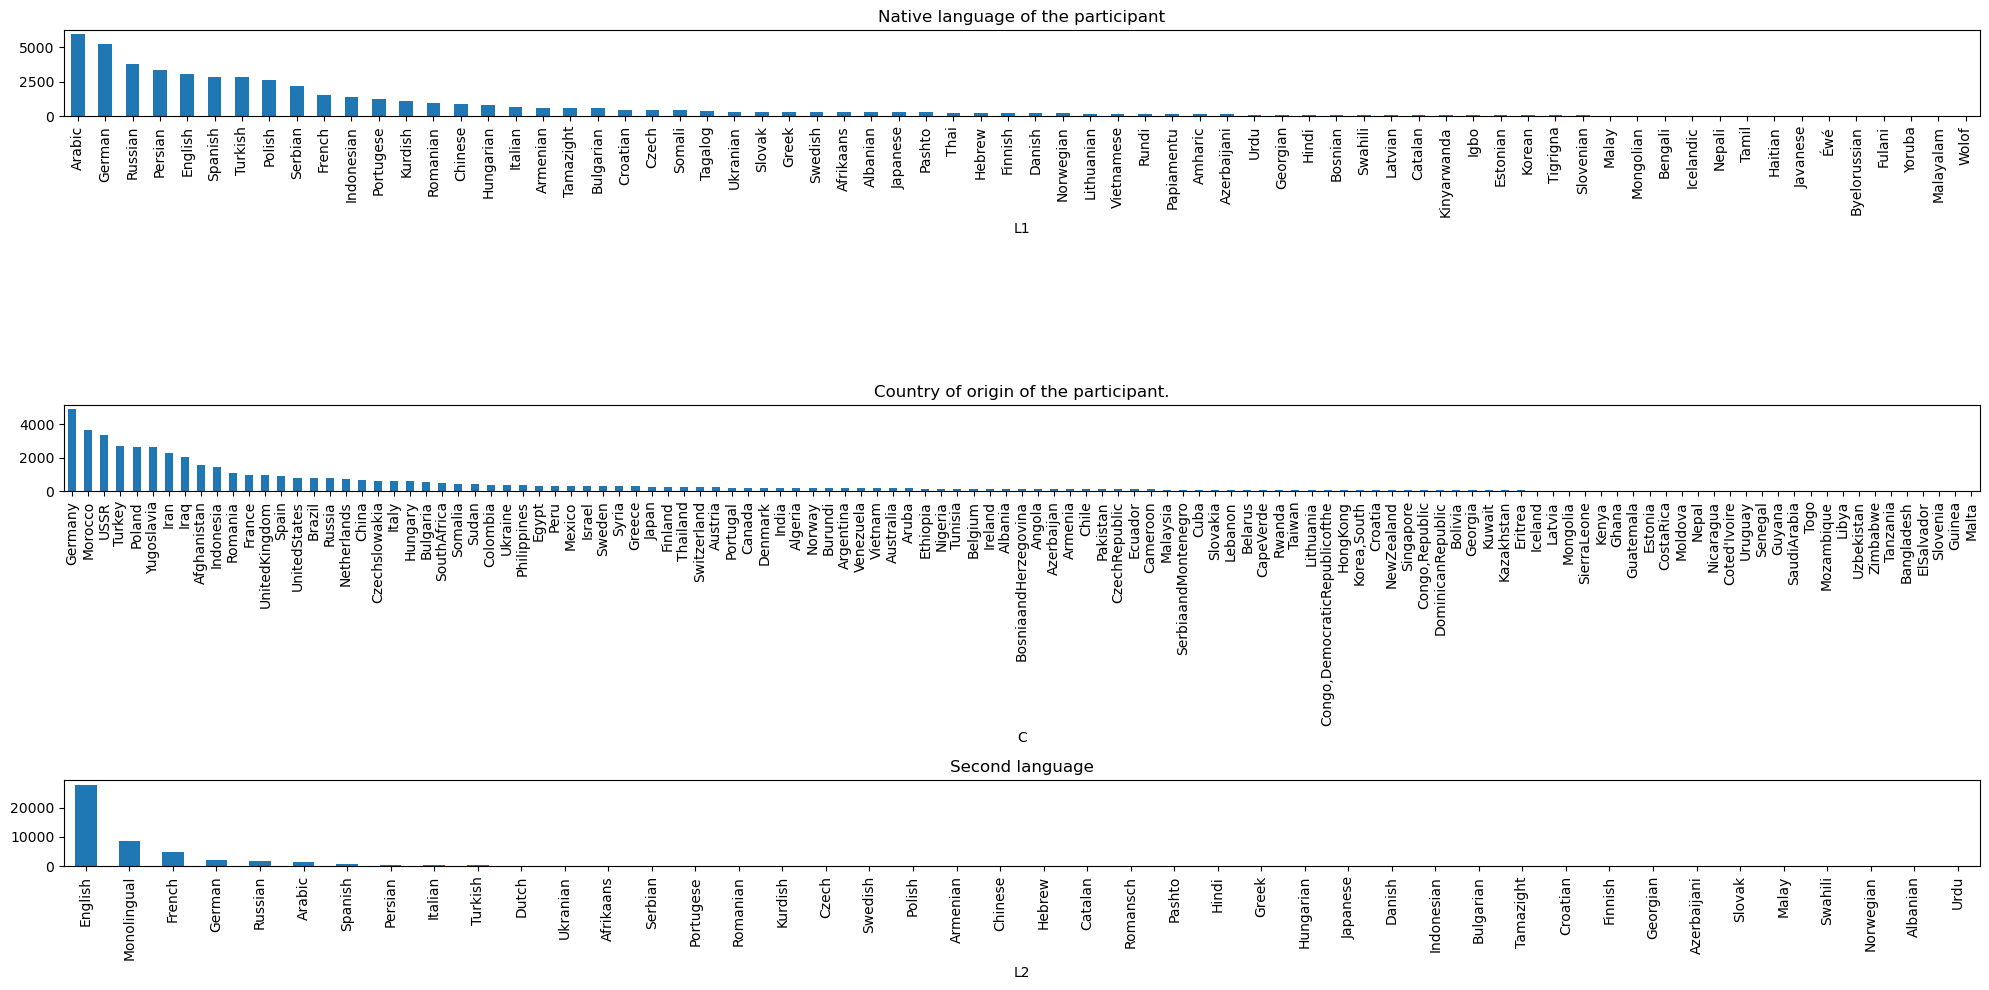

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))

df['L1'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Native language of the participant')

df['C'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Country of origin of the participant.')

df['L2'].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Second language')

plt.tight_layout()
plt.show()

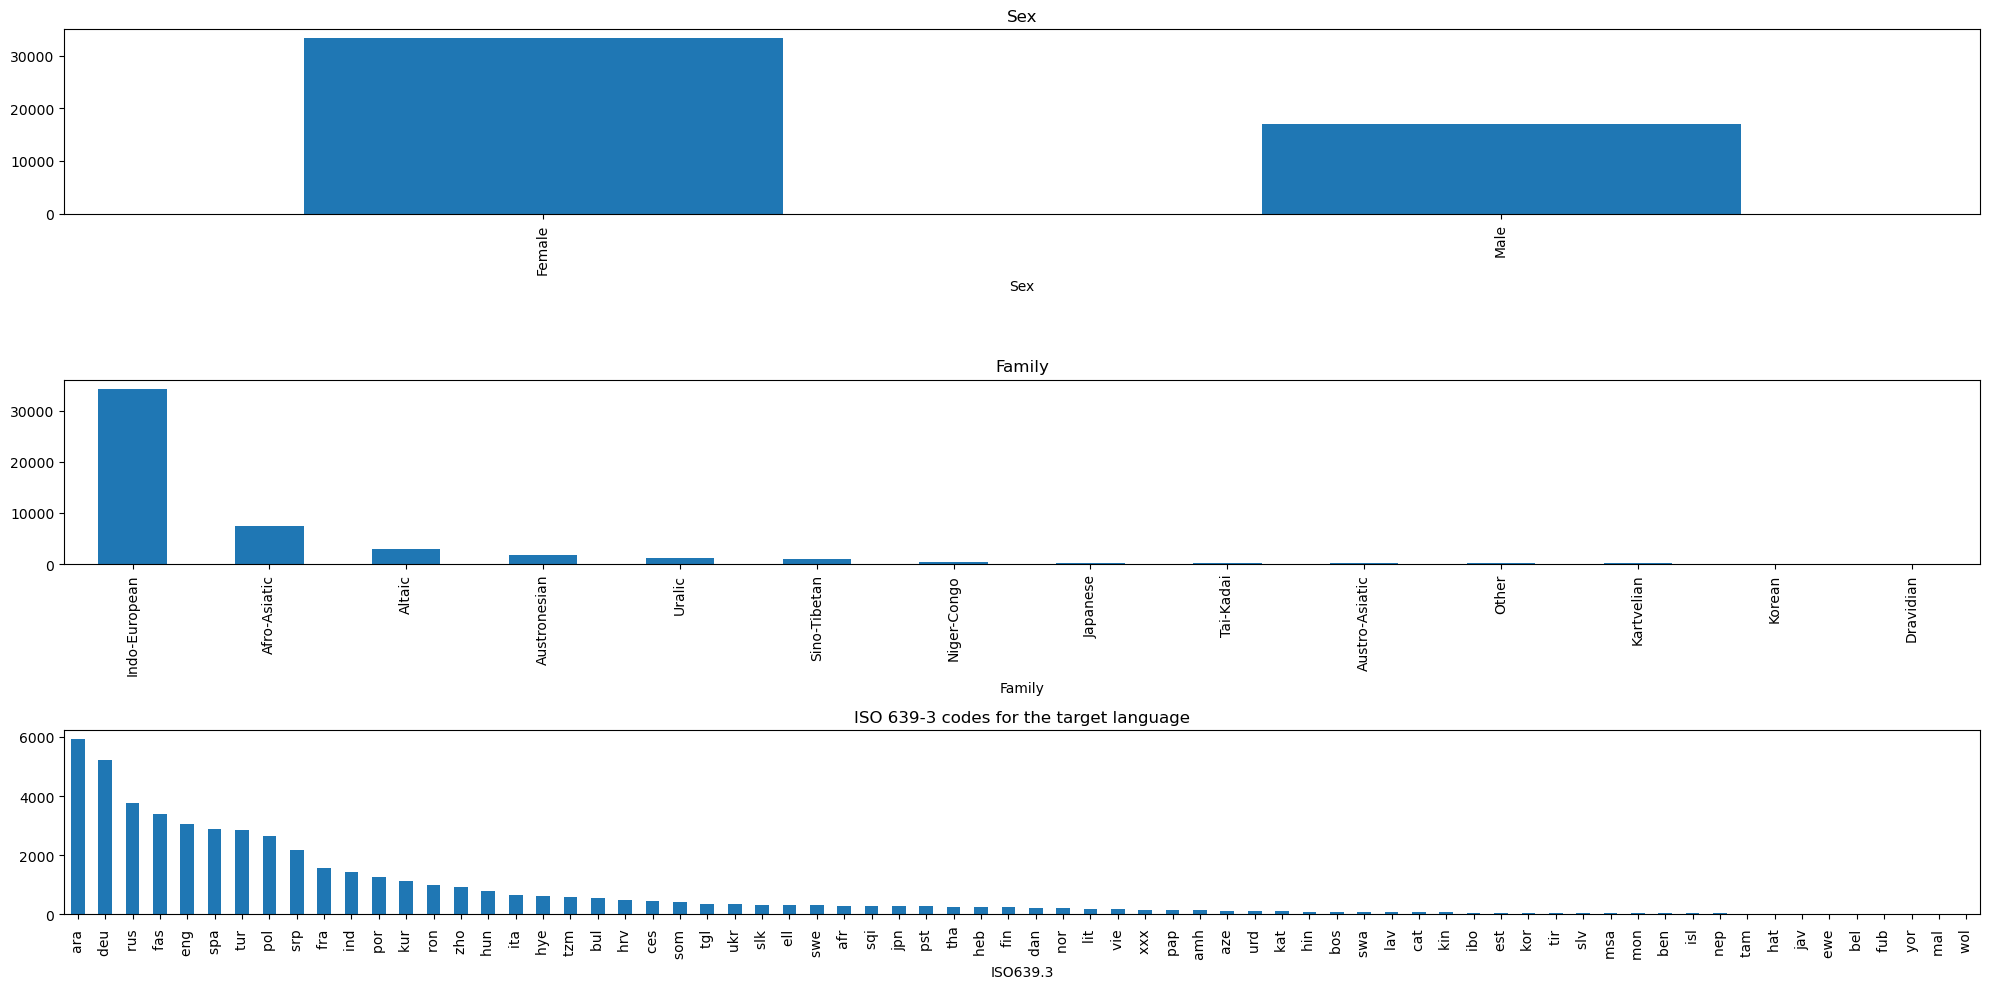

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))

df['Sex'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Sex')

df['Family'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Family')

df['ISO639.3'].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('ISO 639-3 codes for the target language')

plt.tight_layout()
plt.show()

In [21]:
df['ISO639.3'].value_counts()

ISO639.3
ara     5927
deu     5226
rus     3772
fas     3382
eng     3041
        ... 
bel       26
fub       23
yor       23
mal       21
wol       17
Name: count, Length: 70, dtype: int64

In [22]:
df['L1'].value_counts()

L1
Arabic          5927
German          5226
Russian         3772
Persian         3382
English         3041
                ... 
Byelorussian      26
Fulani            23
Yoruba            23
Malayalam         21
Wolof             17
Name: count, Length: 70, dtype: int64

- `ISO639.3` and `L1` are repeated features. We'll drop one of them.

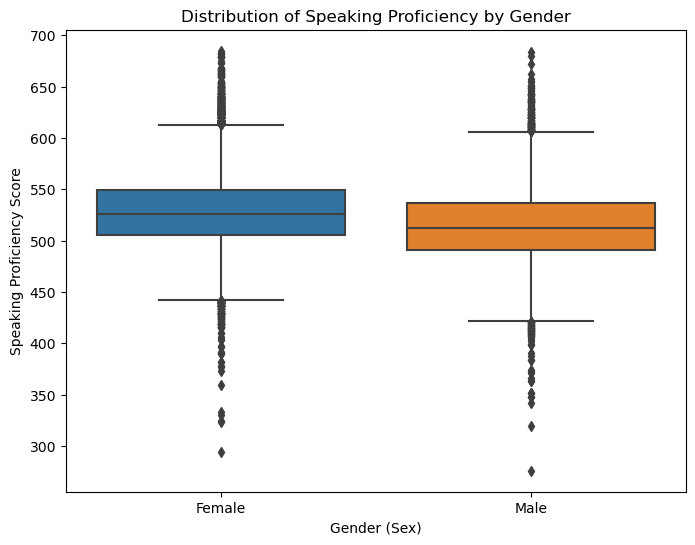

In [23]:
# Create a boxplot for Speaking scores by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, x='Sex', y='Speaking')

# Labels and title
plt.xlabel("Gender (Sex)")
plt.ylabel("Speaking Proficiency Score")
plt.title("Distribution of Speaking Proficiency by Gender")

# Show the plot
plt.show()

- If gender were an important factor, we would expect a noticeable shift in medians or a large difference in variability between groups. This suggests that gender is not a strong predictor of speaking proficiency in this dataset.
- Additionally, we have considered the ethical implications of incorporating gender in a machine learning model. By excluding gender as a feature, we aim to prevent the model from learning potentially biased patterns or making unfair assumptions about language proficiency based on gender. This ensures that predictions remain fair and equitable for all learners.

In [24]:
to_drop = ['Sex', 'ISO639.3']
df = df.drop(columns=to_drop)

In [25]:
df.head()

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Family,Enroll,Speaking
0,Afrikaans,SouthAfrica,AfrikaansEnglish,English,25,0,4.0,Indo-European,93,496
1,Afrikaans,SouthAfrica,AfrikaansGerman,German,47,2,4.0,Indo-European,93,542
2,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,23,23,3.0,Indo-European,93,585
3,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,42,2,2.0,Indo-European,93,521
4,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,22,19,3.0,Indo-European,93,639


In [29]:
# Define a function to categorize individuals based on how many langauges they speak and the family of their first language
def categorize_language(row):
    mono_status = "Mono" if row['L2'] == "Monolingual" else "Multi"
    family_status = "Indo" if row['Family'] == "Indo-European" else "Other"
    return f"{mono_status}{family_status}"


df['Language_Category'] = df.apply(categorize_language, axis=1)

df.head()

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Family,Enroll,Speaking,Language_Category
0,Afrikaans,SouthAfrica,AfrikaansEnglish,English,25,0,4.0,Indo-European,93,496,MultiIndo
1,Afrikaans,SouthAfrica,AfrikaansGerman,German,47,2,4.0,Indo-European,93,542,MultiIndo
2,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,23,23,3.0,Indo-European,93,585,MonoIndo
3,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,42,2,2.0,Indo-European,93,521,MonoIndo
4,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,22,19,3.0,Indo-European,93,639,MonoIndo


In [31]:
df.Language_Category.value_counts()

Language_Category
MultiIndo     28194
MultiOther    13293
MonoIndo       6151
MonoOther      2597
Name: count, dtype: int64

/Users/vivianamarquez/anaconda3/envs/c1_da/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


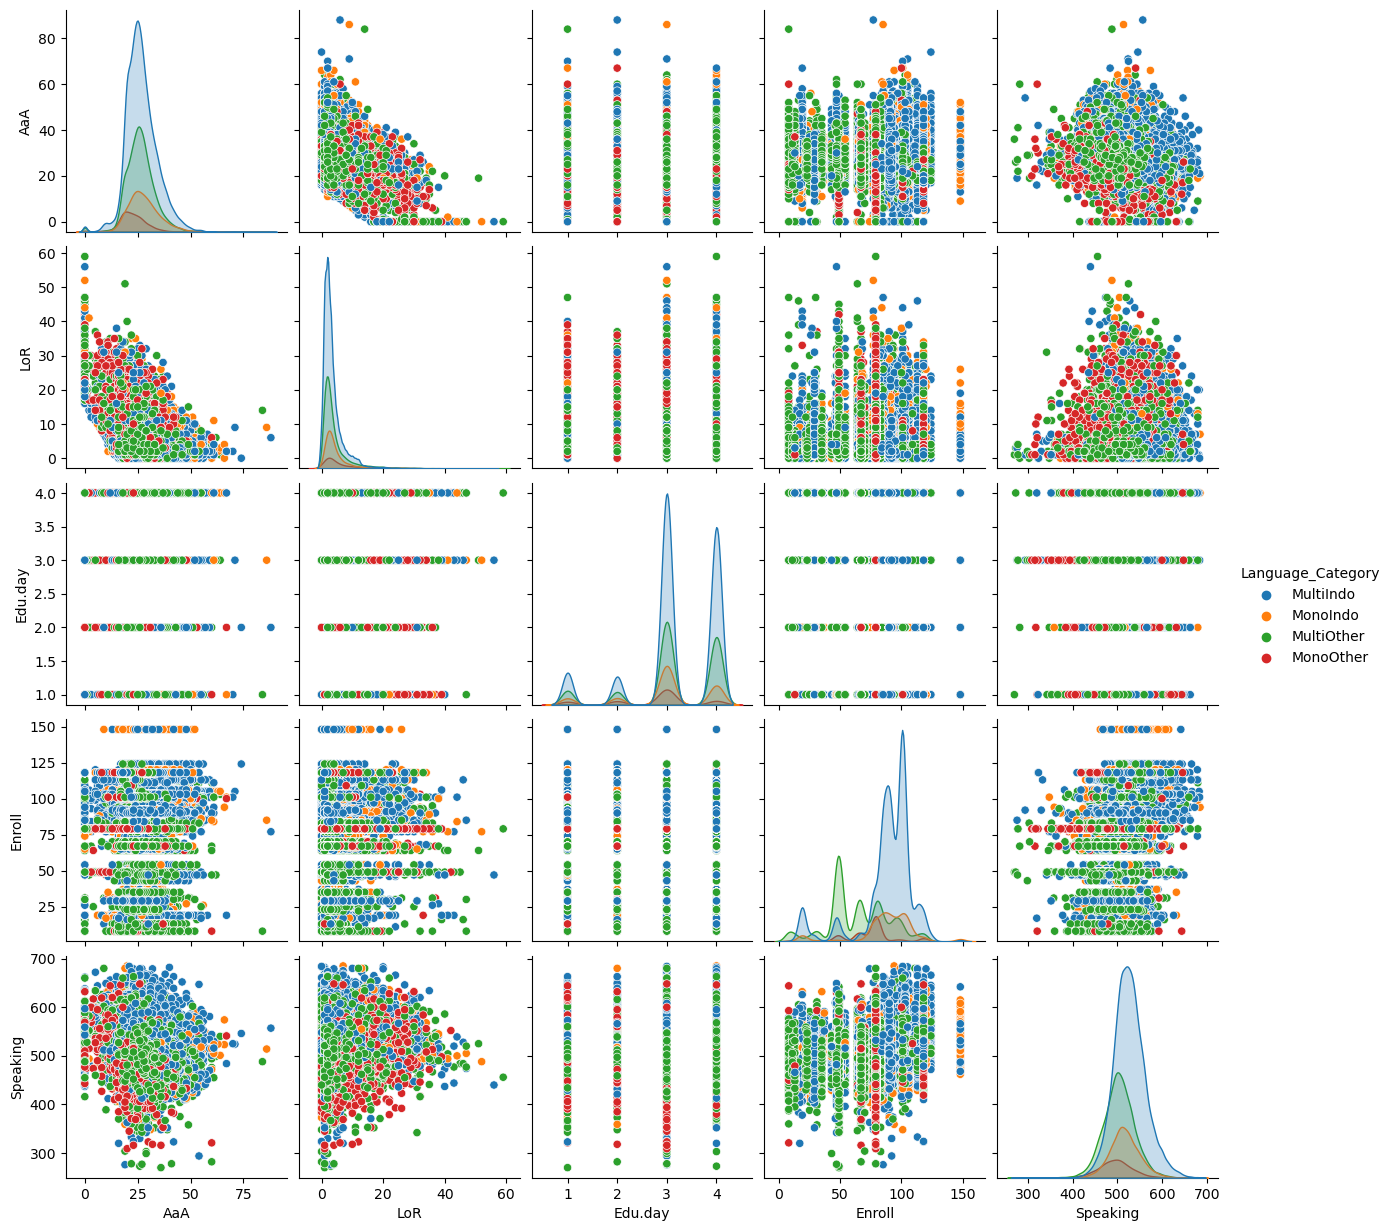

In [32]:
sns.pairplot(df, hue="Language_Category")
plt.show()